In [44]:
import pypsa
import numpy as np

# Create network
network = pypsa.Network()

# Add buses (nodes)
for i in range(5):
    network.add("Bus", f"bus{i}", v_nom=20)

# Add generators (green squares, nodes 2 and 5)
network.add("Generator", "gen1", bus="bus1", p_set=160)
network.add("Generator", "gen2", bus="bus4", p_set=160)

# Add loads (red circles, nodes 1, 3, and 4)
network.add("Load", "load1", bus="bus0", p_set=100)
network.add("Load", "load2", bus="bus2", p_set=100)
network.add("Load", "load3", bus="bus3", p_set=100)

# Add lines with homogeneous coupling K ≈ 1.63
lines_data = [
    ("bus0", "bus1"),
    ("bus0", "bus4"),
    ("bus1", "bus2"),
    ("bus1", "bus3"),
    ("bus2", "bus3"),
    ("bus2", "bus4"),
    ("bus3", "bus4")
]

for i, (bus0, bus1) in enumerate(lines_data):
    network.add("Line", f"line{i}", 
                bus0=bus0, 
                bus1=bus1,
                x=0.1,  # reactance
                r=0.01)  # nominal power

# Set network parameters
#network.set_snapshots(range(24))


/home/lkims/miniconda3/envs/pypsa-eur/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning:

facecolor will have no effect as it has been defined as "never".



(<matplotlib.collections.PatchCollection at 0x72d446369fa0>,
 <matplotlib.collections.LineCollection at 0x72d44636aa50>)

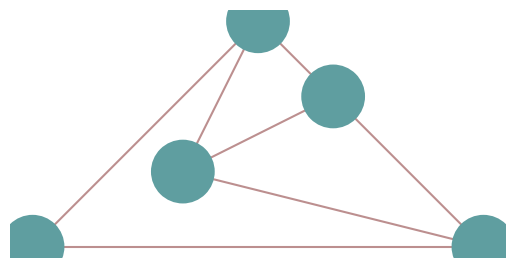

In [45]:
network.plot()

In [46]:
network.lines

,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
line0,bus0,bus1,,0.1,0.01,0.0,0.0,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
line1,bus0,bus4,,0.1,0.01,0.0,0.0,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
line2,bus1,bus2,,0.1,0.01,0.0,0.0,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
line3,bus1,bus3,,0.1,0.01,0.0,0.0,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
line4,bus2,bus3,,0.1,0.01,0.0,0.0,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
line5,bus2,bus4,,0.1,0.01,0.0,0.0,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
line6,bus3,bus4,,0.1,0.01,0.0,0.0,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# Run power flow
network.pf()





INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network <pypsa.components.SubNetwork object at 0x72d451960e60> for snapshots Index(['now'], dtype='object', name='snapshot')


{'n_iter': SubNetwork  0
 snapshot     
 now         3,
 'error': SubNetwork             0
 snapshot                
 now         3.884327e-11,
 'converged': SubNetwork     0
 snapshot        
 now         True}

In [48]:
network.lines_t.p0


,line0,line1,line2,line3,line4,line5,line6
snapshot,,,,,,,
now,-46.737802,-53.262198,46.792581,46.792581,-6.206441e-14,-53.262198,-53.262198
